In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Generando una señal sintética

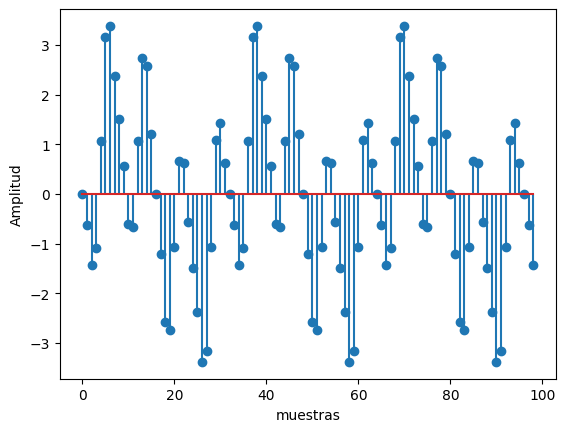

In [27]:
N = 10000
n = np.arange(0,N)
xn = 0.5 * np.sin(2.0*np.pi*1.0/4.0*n) - 2.0 * np.sin(2.0*np.pi*1.0/8.0*n) + 1.5 * np.sin(2.0*np.pi*1.0/32.0*n)
plt.figure(1)
plt.stem(n[0:99],xn[0:99])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Adicionando ruido a la señal sintética

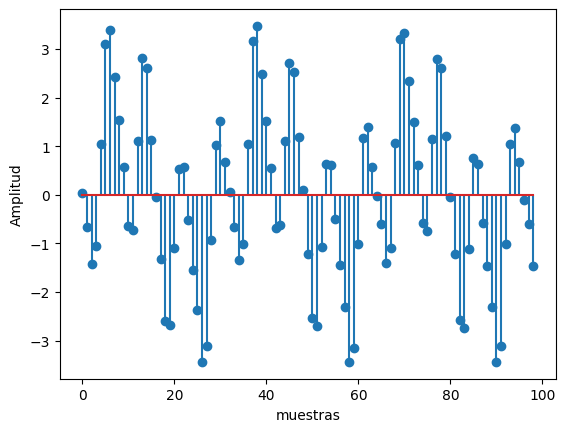

In [28]:
fact_ruido = 0.05
xnr = xn + fact_ruido*np.random.normal(0,1,N)
plt.figure(2)
plt.stem(n[0:99],xnr[0:99])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Aplicando algoritmo LMS

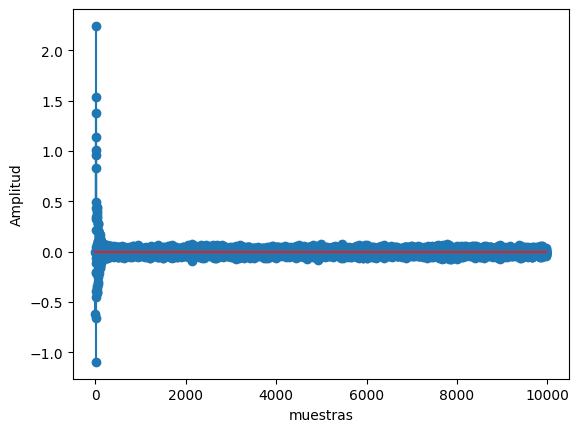

In [29]:
ord = 20
pas = 0.01
# coeficientes iniciales en cero
w = np.zeros(ord)
# Adaptación del filtro
err = np.zeros(N-ord)
for i in range(0,N-ord):
    u = xnr[i:i+ord]
    y_t = np.dot(w,u)
    err[i] = xn[i] - y_t
    w = w + pas * err[i] * xnr[i:i+ord]
plt.figure(3)
plt.stem(err)
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Filtrando la señal ruidosa

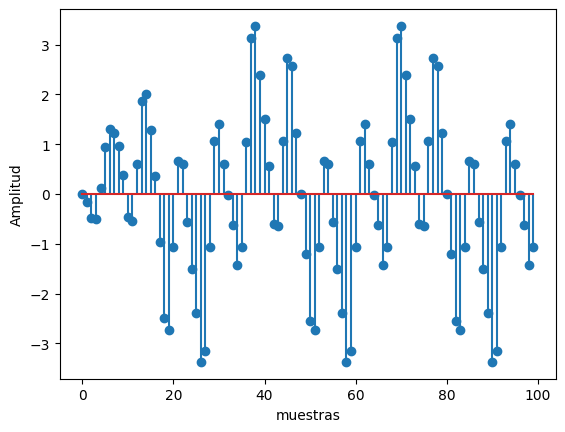

In [30]:
yn = signal.lfilter(w,1,xn)
plt.figure(4)
plt.stem(n[0:100],yn[0:100])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Comparando la señal filtrada con la original

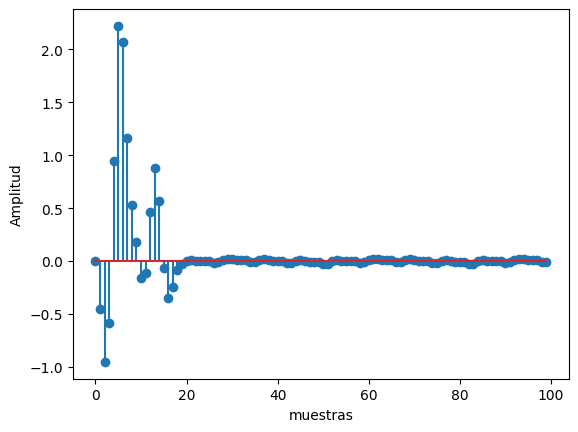

In [31]:
fdif = xn - yn
plt.figure(5)
plt.stem(n[0:100],fdif[0:100])
plt.xlabel('muestras')
plt.ylabel('Amplitud')
plt.show()

Medidas cauntitativas de calidad

In [32]:
from math import log10, sqrt

def PSNR(original, filtrada, max = 255.0):
    mse = np.mean((original - filtrada) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    psnr = 20 * log10(max / sqrt(mse))
    return psnr

Aplicando medida

In [33]:
p_pre = PSNR(xn[ord:],xnr[ord:],np.max(xn))
print(p_pre)
p_pos = PSNR(xn[ord:],yn[ord:],np.max(xn))
print(p_pos)

36.69370316387929
48.36479426606158
